In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.rc('figure', figsize=(10, 6))

## 1 USA.gov Data from Bitly

In [2]:
path = 'datasets/bitly_usagov/example.txt'

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json

In [5]:
records = [json.loads(line) for line in open(path)]

In [6]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### 1.1 Counting Time Zones in Pure Python

In [23]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [24]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [12]:
def get_counts(sequence):
    """
    Count the number of every unique items in a sequence
    """
    counts = dict()
    for item in sequence:
        counts[item] = counts.get(item, 0) + 1
    return counts

In [13]:
from collections import defaultdict

In [14]:
def get_counts_defaultdict(sequence):
    """
    Using the defaultdict class instead
    """
    counts = defaultdict(int) # values will initialize to 0
    for item in sequence:
        counts[item] += 1
    return counts

In [15]:
%time counts_1 = get_counts(time_zones)

CPU times: user 3.48 ms, sys: 1.35 ms, total: 4.83 ms
Wall time: 3.79 ms


In [16]:
%time counts_2 = get_counts_defaultdict(time_zones)

CPU times: user 2.3 ms, sys: 1.07 ms, total: 3.37 ms
Wall time: 2.54 ms


In [25]:
counts = get_counts_defaultdict(time_zones)

Geting the top 10 time zones and their counts

In [42]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) 
                       for tz, count in count_dict.items()]
    value_key_pairs.sort(reverse=True)
    return value_key_pairs[:10]

In [43]:
top_counts(counts)

[(1251, u'America/New_York'),
 (521, u''),
 (400, u'America/Chicago'),
 (382, u'America/Los_Angeles'),
 (191, u'America/Denver'),
 (74, u'Europe/London'),
 (37, u'Asia/Tokyo'),
 (36, u'Pacific/Honolulu'),
 (35, u'Europe/Madrid'),
 (33, u'America/Sao_Paulo')]

Using the `collections.Counter` instead

In [44]:
from collections import Counter

In [45]:
counts = Counter(time_zones)

In [46]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

In [47]:
?counts

### 1.2 Counting Time Zones with pandas

Creating a DataFrame from the original set of records

In [50]:
frame = pd.DataFrame(records)

In [51]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [54]:
tz_counts = frame['tz'].value_counts()

In [56]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

Repalce the missing values with 'Missing', the empty strings with 'Unknown'

In [57]:
clean_tz = frame['tz'].fillna('Missing')

In [58]:
clean_tz[clean_tz == ''] = 'Unknown'

In [59]:
tz_counts = clean_tz.value_counts()

In [60]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

Make a horizontal bar plot

In [64]:
subset = tz_counts[:10]

In [74]:
sns.barplot(y=subset.index, x=subset.values)

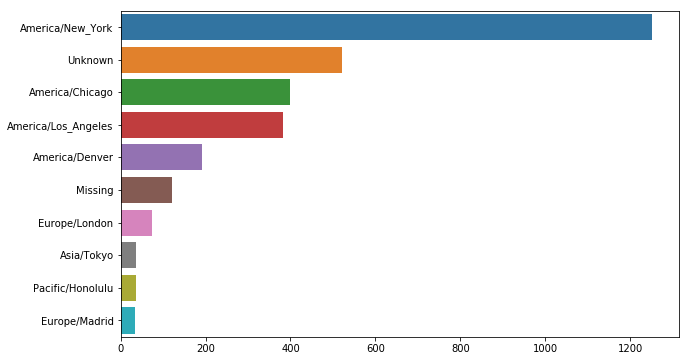

In [75]:
plt.show()

The `a` field contains information about the browser, device, or application used to perform the URL shortening

In [76]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [77]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [78]:
frame['a'][51][:50]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

Split the string and make summary of them one by one

In [79]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [80]:
results.head()

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [81]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

Exclude the rows whose agents are missing

In [85]:
cframe = frame[frame.a.notnull()]

Compute a value for wheter each row is Windows or not

In [91]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [93]:
cframe['os'].head()

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

Group the data by its time zone column and os column

In [94]:
by_tz_os = cframe.groupby(['tz', 'os'])

Use the `size` method to compute the group size

In [97]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [98]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [100]:
pd.crosstab(cframe.tz, cframe.os)[:10]

os,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


Select the top overall time zones. To do so, I construct an indirect index array from the row counts in agg_counts. The `argsort` method return a new sorted series with values indicating their row positions in source series

In [106]:
indexer = agg_counts.sum(1).argsort()

In [107]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

Use `take` to select the rows in that order

In [120]:
count_subset = agg_counts.take(indexer[-10:])

In [121]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [110]:
indexer['America/New_York']

84

pandas has a convenient method called `nlargest` that does the same thing

In [115]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

Make a stacked bar plot

In [122]:
test = count_subset.copy()

In [123]:
count_subset = count_subset.stack()

In [124]:
count_subset.name = 'total'

In [125]:
count_subset = count_subset.reset_index()

In [126]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


In [129]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

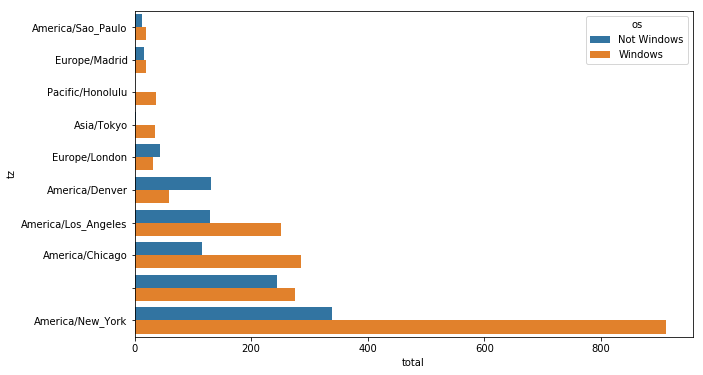

In [130]:
plt.show()

Normalize the group percentages to sum to 1

In [132]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

In [133]:
results = count_subset.groupby('tz').apply(norm_total)

In [136]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

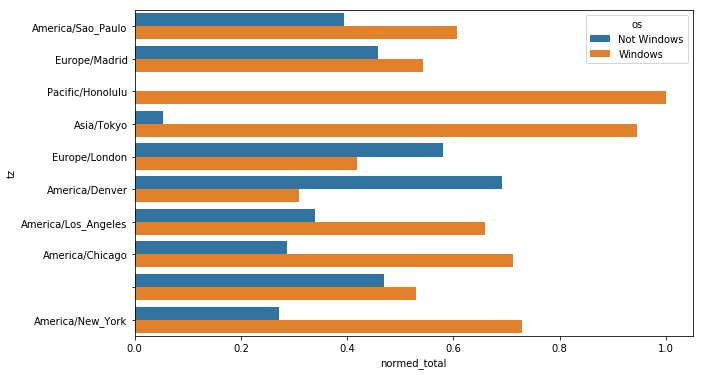

In [137]:
plt.show()

In [147]:
g = count_subset.groupby('tz')

In [155]:
g.total

## 2 MovieLens 1M Dataset

In [11]:
!head -10 datasets/movielens/users.dat

1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117
4::M::45::7::02460
5::M::25::20::55455
6::F::50::9::55117
7::M::35::1::06810
8::M::25::12::11413
9::M::25::17::61614
10::F::35::1::95370


In [14]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

In [15]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

In [16]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

In [17]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip           6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [20]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [21]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [22]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [24]:
data = pd.merge(pd.merge(ratings, movies), users)

In [25]:
data.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


Compute mean ratings for each movie grouped by gender

In [26]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender',
                                aggfunc='mean')

In [31]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [34]:
mean_ratings_2 = data.groupby(['title', 'gender'])['rating'].mean().unstack()

In [35]:
mean_ratings_2.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


Filter down to movies that received at least 250 ratings

In [40]:
ratings_by_title = data.groupby('title').size()

In [42]:
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [43]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [44]:
mean_ratings = mean_ratings.loc[active_titles]

In [45]:
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [47]:
mean_ratings_2[ratings_by_title >= 250].head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers

In [48]:
?mean_ratings.sort_values

In [51]:
top_female_ratings = mean_ratings.sort_values('F', ascending=False)

In [52]:
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


### 2.1 Measuring Rating Disagreement

Find the movies that are most divisive between male and female viewers

In [53]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [54]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [55]:
sorted_by_diff.head(10)

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Find the movies that elicited the most disagreement among viewers, independent of gender identification

In [61]:
rating_std_by_title = data.groupby('title')['rating'].std()

In [63]:
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [66]:
rating_std_by_title.sort_values(ascending=False).head(10)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 3 US Baby Names 1880-2010

In [67]:
!head -n 10 datasets/babynames/yob1880.txt

In [69]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])

In [70]:
names1880.head(10)

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


The total number of births in the year

In [71]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

Assemble all of the data into a single DataFrame

In [73]:
years = range(1880, 2011)
pieces = list()
columns = ['name', 'sex', 'birth']

In [74]:
for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [75]:
names = pd.concat(pieces, ignore_index=True)

In [79]:
names.head()

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


Compute total birth for each years group by gender

In [81]:
total_births = names.pivot_table('birth', index='year', columns='sex',
                                 aggfunc=sum)

In [82]:
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [83]:
total_births.plot(title='Total births by sex and year')

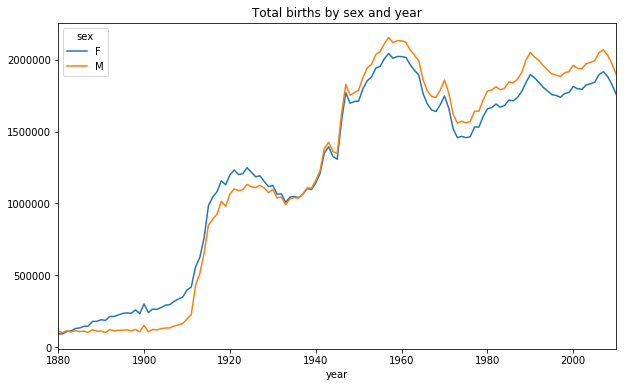

In [84]:
plt.show()